In [53]:
from keras.models import Sequential
from keras.layers import Dense, GRU
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import os

# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR



In [54]:
# Load the data sets and combine them into a single usable dataframe called data series
data_series = pd.read_csv('./data/data_avg_temp.csv')

# rename columns to be more descriptive
data_series.columns = ['date', 'avg_temp', 'avg_temp_anomaly']
data_series.drop(columns=['avg_temp_anomaly'], inplace=True)

# append to the dataframe
data_cool_degree = pd.read_csv('./data/data_cool_degree_days.csv')
data_heat_degree = pd.read_csv('./data/data_heat_degree_days.csv')
data_max_temp = pd.read_csv('./data/data_max_temp.csv')
data_min_temp = pd.read_csv('./data/data_min_temp.csv')
data_palmer_z = pd.read_csv('./data/data_palmer_z.csv')
data_pdsi = pd.read_csv('./data/data_pdsi.csv')
data_phdi = pd.read_csv('./data/data_phdi.csv')
data_pmdi = pd.read_csv('./data/data_pmdi.csv')
data_precipitation = pd.read_csv('./data/data_precipitation.csv')



# Append columns to the data series
# data_series['cool_degree_days_anomaly'] = data_cool_degree['Anomaly']

data_series['heat_degree_days'] = data_heat_degree['Value']
# data_series['heat_degree_days_anomaly'] = data_heat_degree['Anomaly']

data_series['max_temp'] = data_max_temp['Value']
# data_series['max_temp_anomaly'] = data_max_temp['Anomaly']

data_series['min_temp'] = data_min_temp['Value']
# data_series['min_temp_anomaly'] = data_min_temp['Anomaly']

# data_series['palmer_z'] = data_palmer_z['Value']
# # data_series['palmer_z_anomaly'] = data_palmer_z['Anomaly']

# data_series['pdsi'] = data_pdsi['Value']
# # data_series['pdsi_anomaly'] = data_pdsi['Anomaly']

# data_series['phdi'] = data_phdi['Value']
# # data_series['phdi_anomaly'] = data_phdi['Anomaly']

# data_series['pmdi'] = data_pmdi['Value']
# data_series['pmdi_anomaly'] = data_pmdi['Anomaly']

data_series['precipitation'] = data_precipitation['Value']
# data_series['precipitation_anomaly'] = data_precipitation['Anomaly']




In [55]:
# Convert dataframe to numpy array
avg_temp = data_series['avg_temp'].to_numpy()
data_series.drop(columns=['avg_temp'], inplace=True)

print(data_series.columns)
print(data_series.head())
x = data_series.to_numpy()

# Expand first dim
x = np.expand_dims(x, axis=0)
avg_temp = np.expand_dims(avg_temp, axis=0)

# print(x)


Index(['date', 'heat_degree_days', 'max_temp', 'min_temp', 'precipitation'], dtype='object')
     date  heat_degree_days  max_temp  min_temp  precipitation
0  189512              5329      65.3      37.1          16.53
1  189601              5249      65.6      37.1          16.10
2  189602              5108      66.2      37.5          15.55
3  189603              5066      66.3      37.5          15.64
4  189604              5066      66.4      37.4          15.83


In [56]:
# Train the GRU model
model_gru = Sequential(
    [
        GRU(20, activation='relu', input_shape=(x.shape[1], x.shape[2])),
        Dense(1)
    ]
)

model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(x, avg_temp, epochs=200, batch_size=1)


Epoch 1/200


/home/frederik/miniconda3/envs/ml_new_mexico/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - loss: 435205632.0000
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 396407360.0000
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 359552672.0000
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 324659712.0000
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 291741280.0000
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 260802608.0000
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 231842944.0000
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 204854496.0000
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 179821440.0000
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 156720384.0000
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 135520064.0000
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 41949320.0000
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 32949256.0000
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 2

In [57]:
# Predict the temperature by regressing the other features and then predicting average temperature
parameters = ['heat_degree_days', 'max_temp', 
              'min_temp', 'precipitation']
# parameters = ['cool_degree_days']
models = {}
scalers = {}

date = data_series['date'].to_numpy()
date_splice = np.zeros((len(date), 2))

param_models = []

for i, element in enumerate(date):
    # print(element)
    # Splice this string to get year and month
    date_splice[i,0] = int(str(element)[0:4])
    date_splice[i,1] = int(str(element)[5:7])

for param in parameters:
    print(f"PARAM", param)
    y = data_series[param].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(date_splice, y, test_size=0.2, shuffle=False)

    model = Sequential([
        Dense(5, activation='relu', input_shape=(X_train.shape[1],)),  # input_shape=(2,)
        Dense(1)  # Output layer
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test))

    # Save model
    param_models.append(model)

    # Cool degrees (Pdsi)

PARAM heat_degree_days
Epoch 1/300


/home/frederik/miniconda3/envs/ml_new_mexico/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1350846.8750 - val_loss: 164855.7812
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 930039.1250 - val_loss: 68051.1250
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 541363.6875 - val_loss: 73172.6719
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 327174.1875 - val_loss: 146473.8750
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 193111.5938 - val_loss: 247587.9219
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126380.7344 - val_loss: 337357.9688
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 106996.8125 - val_loss: 411653.7188
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93576.8906 - val_loss: 453448.7188
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93260.2188 - val_loss: 480031.9375
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92875.4375 - val_loss: 487841.6562
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95559

In [58]:
# Prediction of the average temperature
# Using the trained models to predict the parameters and then use those predictions as input for the GRU model

# Predict the parameters for the next 5 year * 12 months (60 datapoints)

# Get dates for prediction (202401-202812)
years = 5
date_predict = np.zeros((years*12, 2))
for i in range(years*12):
    date_predict[i, 0] = 2024 + i // 12
    date_predict[i, 1] = 1 + i % 12


param_predicts = np.zeros((len(parameters),years*12))

#  Predict the parameters.
for k, model in enumerate(param_models):
    for i in range(years*12):
        answer = model.predict(date_predict[i].reshape(1, -1))
        param_predicts[k, i] = answer

yearmonth_vec = np.zeros((years*12,1))
for i in range(years*12):
    yearmonth_vec[i] = date_predict[i, 0] * 100 + date_predict[i, 1]

params_predicts = np.append(yearmonth_vec, param_predicts.T, axis=1)

print(params_predicts)

# # Use predicted params for GRU input to predict avg_temp
# predictions = []

# for i in range(years*12):
#     new_timestep = params_predicts[i,:]
#     new_timestep = np.expand_dims(new_timestep, axis=0)
#     x = np.append(x[:,1:,:], np.expand_dims(new_timestep, axis=0), axis=1)

#     # x = np.expand_dims(params_predicts[i, :], axis=0)
#     avg_temp_predict = model_gru.predict(x)
#     predictions.append(avg_temp_predict)


# print(predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/tmp/ipykernel_1095418/4112959877.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  param_predicts[k, i] = answer


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━

In [59]:
for i in range(years*12):
    print(f"Year: {int(params_predicts[i,0]//100)} Month: {int(params_predicts[i,0]%100)}")
    print(f"Predicted parameters:")
    for j, param in enumerate(parameters):
        print(f"{param}: {params_predicts[i,j+1]}")

Year: 2024 Month: 1
Predicted parameters:
heat_degree_days: 5105.65625
max_temp: 70.203369140625
min_temp: 39.8935661315918
precipitation: 15.061387062072754
Year: 2024 Month: 2
Predicted parameters:
heat_degree_days: 5106.51953125
max_temp: 70.23920440673828
min_temp: 39.78017044067383
precipitation: 15.0621976852417
Year: 2024 Month: 3
Predicted parameters:
heat_degree_days: 5107.38232421875
max_temp: 70.27503967285156
min_temp: 39.66682815551758
precipitation: 15.063009262084961
Year: 2024 Month: 4
Predicted parameters:
heat_degree_days: 5108.2451171875
max_temp: 70.31087493896484
min_temp: 39.55343246459961
precipitation: 15.063865661621094
Year: 2024 Month: 5
Predicted parameters:
heat_degree_days: 5109.10791015625
max_temp: 70.34671783447266
min_temp: 39.440059661865234
precipitation: 15.064738273620605
Year: 2024 Month: 6
Predicted parameters:
heat_degree_days: 5109.97119140625
max_temp: 70.38256072998047
min_temp: 39.326663970947266
precipitation: 15.06554889678955
Year: 2024 M

In [60]:

# Use predicted params for GRU input to predict avg_temp
predictions = []

for i in range(years*12):
    new_timestep = params_predicts[i,:]
    new_timestep = np.expand_dims(new_timestep, axis=0)
    x = np.append(x[:,1:,:], np.expand_dims(new_timestep, axis=0), axis=1)

    # x = np.expand_dims(params_predicts[i, :], axis=0)
    avg_temp_predict = model_gru.predict(x)
    predictions.append(avg_temp_predict)


print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

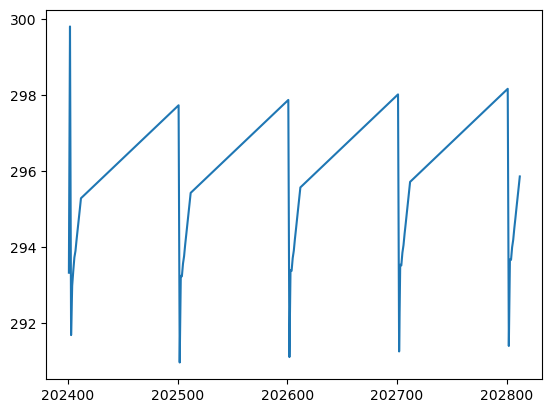

In [61]:
# plot the predictions
predictions = np.array(predictions).reshape(-1)
plt.plot(yearmonth_vec, predictions, label='Predicted')